In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/leningschulich/schulich_data_science/main/sales_data.csv'
df = pd.read_csv(df2)
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [219]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [220]:
df.describe(include = 'all')
#we can see there are 50 types of product and 10 unique regions.

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_5,Region_9,NaN,NaN,2023-10-09
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [221]:
df[df['Product'].isnull()]
#we can delete these rows as product column has value of NaN

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
18,NaN,NaN,276.27,9.0,2022-01-19
21,NaN,NaN,46.10,14.0,2022-01-22
27,NaN,Region_10,193.85,10.0,2022-01-28
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
997,NaN,Region_7,311.80,13.0,2024-09-24
1021,NaN,Region_2,108.89,7.0,2023-05-22
1024,NaN,Region_7,99.98,8.0,2023-07-21


In [222]:
df[df['Region'].isnull()]
#we can delete these rows as Region column has value of NaN

,Product,Region,Price,Units Sold,Sale Date
18,NaN,NaN,276.27,9.0,2022-01-19
21,NaN,NaN,46.10,14.0,2022-01-22
43,Product_35,NaN,112.27,4.0,2022-02-13
54,Product_12,NaN,96.49,16.0,2022-02-24
57,NaN,NaN,30.71,12.0,2022-02-27
...,...,...,...,...,...
996,Product_36,NaN,46.19,9.0,2024-09-23
1005,Product_15,NaN,59.91,NaN,2022-05-17
1017,Product_1,NaN,110.06,9.0,2023-12-11
1034,Product_39,NaN,29.22,10.0,2024-07-07


In [223]:
df.drop(df[df['Product'].isnull()].index,axis =0,inplace=True)# drop rows  
df.drop(df[df['Region'].isnull()].index,axis =0,inplace=True)# drop rows  

In [224]:
print(df['Units Sold'].mean(),df['Units Sold'].median())

10.090791180285343 10.0


We can find that the mean value and the median value of Units Sold are almost the same, thus we now decide to fill in the null value with a specified mean value

In [225]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())
df['Units Sold']

2       12.0
3       10.0
4        6.0
5       11.0
6        6.0
        ... 
1044     6.0
1045     8.0
1046     8.0
1047    11.0
1049     8.0
Name: Units Sold, Length: 853, dtype: float64

In [226]:
print(df['Price'].mean(),df['Price'].median())

108.62498691099475 78.41


We can find that the mean and median value are not close to each other, thus we drop null value in Price column.

In [227]:
df.drop(df[df['Price'].isnull()].index,axis =0,inplace=True)# drop rows  

In [228]:
df.info()# we now have 764 rows and all of them have a value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     764 non-null    object 
 1   Region      764 non-null    object 
 2   Price       764 non-null    float64
 3   Units Sold  764 non-null    float64
 4   Sale Date   764 non-null    object 
dtypes: float64(2), object(3)
memory usage: 35.8+ KB


In [229]:
df.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     725 non-null    object 
 1   Region      725 non-null    object 
 2   Price       725 non-null    float64
 3   Units Sold  725 non-null    float64
 4   Sale Date   725 non-null    object 
dtypes: float64(2), object(3)
memory usage: 34.0+ KB


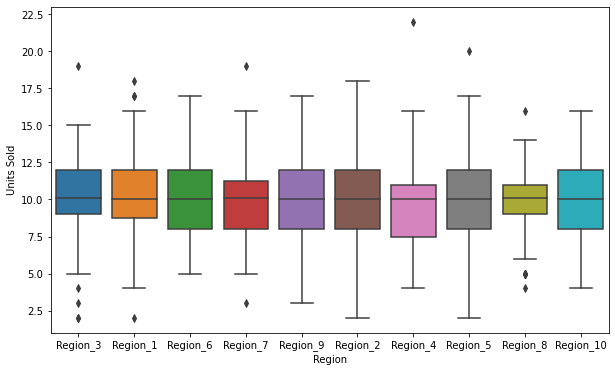

In [255]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y = 'Units Sold', x = 'Region')
plt.show()

We can find for region3, region7, region 4 and region5, there are obvious outliers shown in the boxplot. Thus, we drop these outliers.

In [261]:
df.drop(df[(df['Units Sold']>=17.5)&(df['Region']=='Region_3')].index,axis =0,
        inplace=True)
df.drop(df[(df['Units Sold']>=17.5)&(df['Region']=='Region_7')].index,axis =0,
        inplace=True)
df.drop(df[(df['Units Sold']>=20)&(df['Region']=='Region_4')].index,axis =0,
        inplace=True)
df.drop(df[(df['Units Sold']>=17.5)&(df['Region']=='Region_5')].index,axis =0,
        inplace=True)

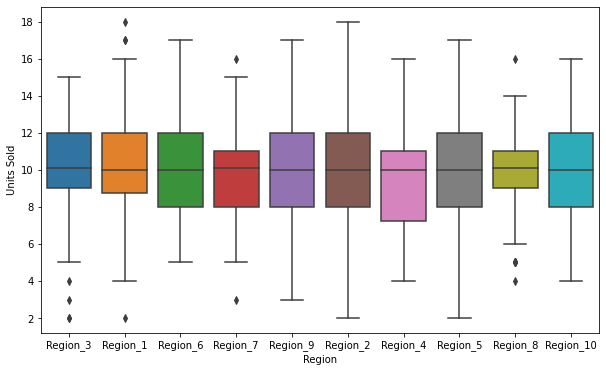

In [262]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y = 'Units Sold', x = 'Region')
plt.show()

Next, to further know the performance of various products and regions, we add a new column to df which called revenue

In [230]:
df['revenue'] = df['Price']*df['Units Sold']
df['revenue']

2       245.160000
3       127.700000
4       754.140000
5        94.930000
6       142.380000
          ...     
988    2431.577951
993    2184.670000
994     666.680000
998     651.600000
999     341.700000
Name: revenue, Length: 725, dtype: float64

In [231]:
df

,Product,Region,Price,Units Sold,Sale Date,revenue
2,Product_46,Region_3,20.43,12.000000,2022-01-03,245.160000
3,Product_36,Region_1,12.77,10.000000,2022-01-04,127.700000
4,Product_17,Region_6,125.69,6.000000,2022-01-05,754.140000
5,Product_45,Region_1,8.63,11.000000,2022-01-06,94.930000
6,Product_31,Region_3,23.73,6.000000,2022-01-07,142.380000
...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.090791,2024-09-15,2431.577951
993,Product_7,Region_9,128.51,17.000000,2024-09-20,2184.670000
994,Product_1,Region_4,95.24,7.000000,2024-09-21,666.680000
998,Product_2,Region_10,43.44,15.000000,2024-09-25,651.600000


We want to further figure out which regions have high selling revenue and which regions have a low revenue. Thus, we make a bar chart to demonstrate the data.

<AxesSubplot:xlabel='Region', ylabel='revenue'>

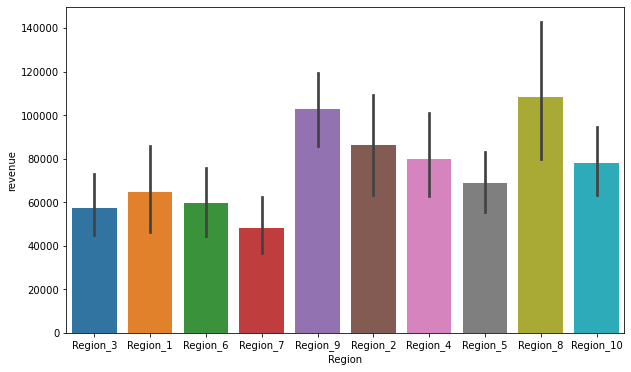

In [263]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region',y='revenue',data=df,estimator=sum)

We can find that Region9, Region2, Region8, region4 and region10  are the top five regions where selling revenue are higher or around $80000. To continue analyzing these five areas, we then make pie chart for each one of them to find out what kind of products are the popular one. 

In [264]:
region_9 = df.loc[df['Region']=='Region_9']
region_2 = df.loc[df['Region']=='Region_2']
region_4 = df.loc[df['Region']=='Region_4']
region_8 = df.loc[df['Region']=='Region_8']
region_10 = df.loc[df['Region']=='Region_10']

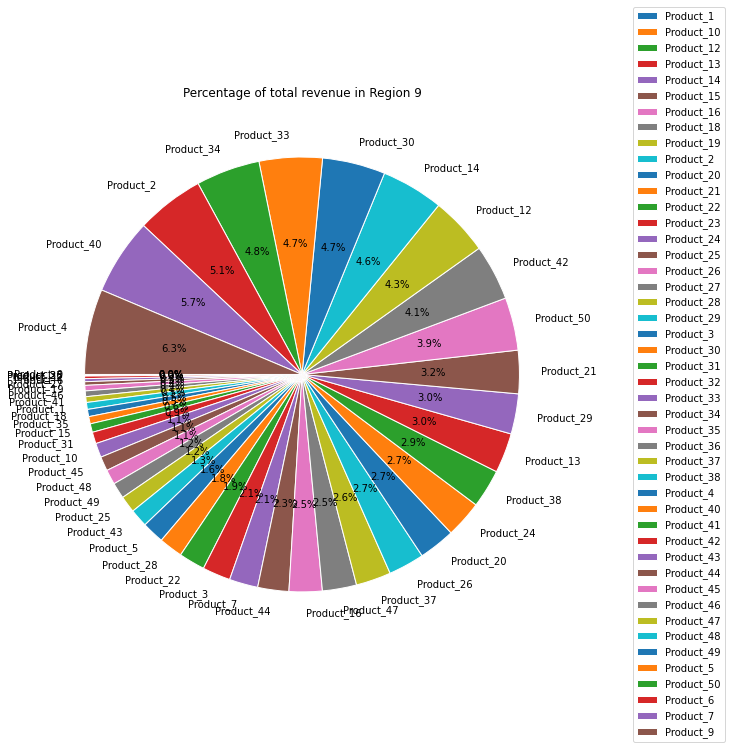

In [269]:
Total_revenue_9 = region_9.groupby('Product')['revenue'].sum()
Total_revenue_9
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_9.sort_values()).values,labels=(Total_revenue_9.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_9.index, loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.title('Percentage of total revenue in Region 9')
plt.show()

Regarding of sales performance of various products and region9, we can find that Product_4 is the most popular one in this area, while there are also several products, such as product 40, product 2, product 34, have similar proportions of sales in region9.

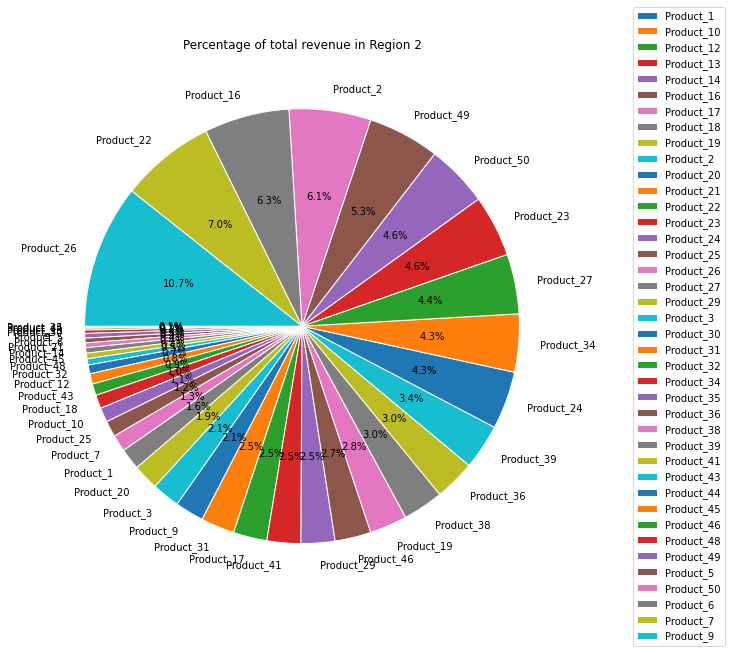

In [270]:
Total_revenue_2 = region_2.groupby('Product')['revenue'].sum()
Total_revenue_2
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_2.sort_values()).values,labels=(Total_revenue_2.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_2.index, loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.title('Percentage of total revenue in Region 2')
plt.show()

According to the pie chart of revenue vs region2, we can clearly see that product 26 accounts for a large proportion of sales, which is one tenth of the selling revenue.

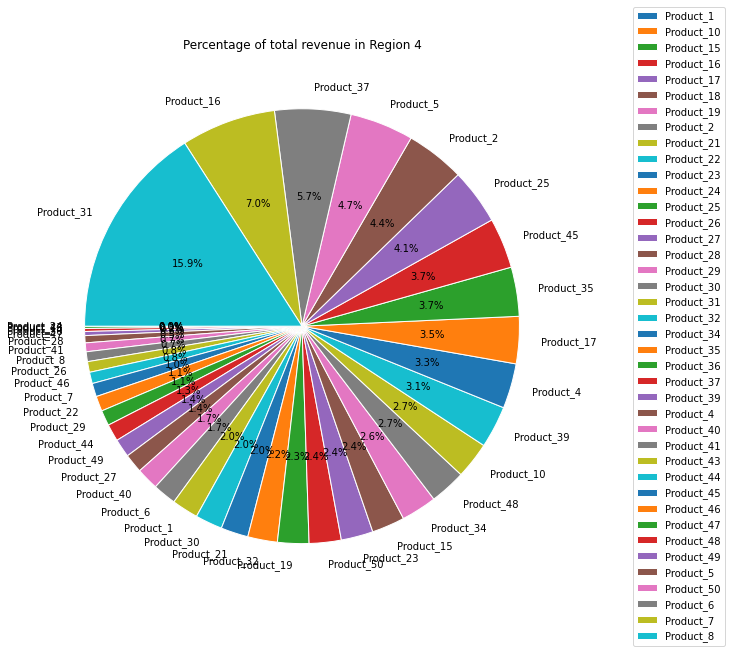

In [271]:
Total_revenue_4 = region_4.groupby('Product')['revenue'].sum()
Total_revenue_4
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_4.sort_values()).values,labels=(Total_revenue_4.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_4.index, loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.title('Percentage of total revenue in Region 4')
plt.show()

According to the pie chart of revenue vs region4, we can clearly see that product 31 accounts for a large proportion of sales, which is around 16% of the selling revenue.

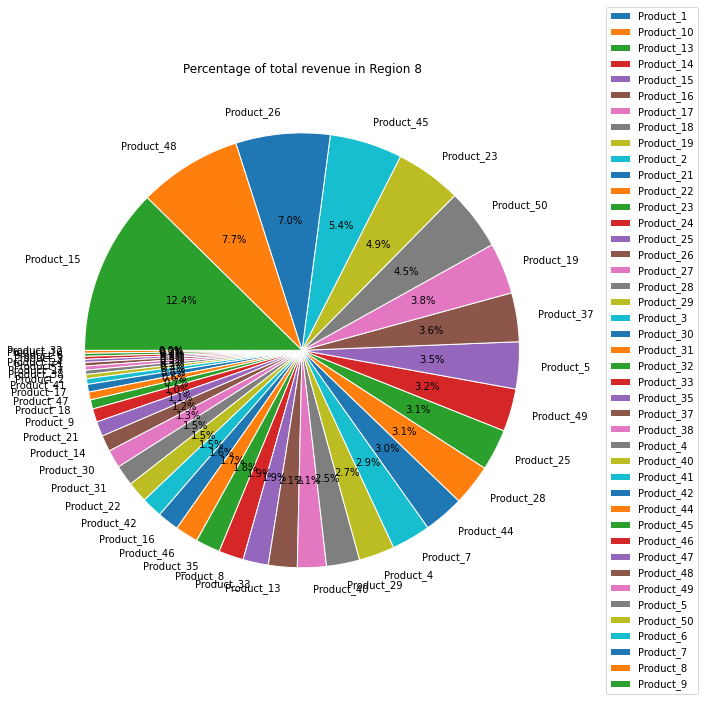

In [272]:
Total_revenue_8 = region_8.groupby('Product')['revenue'].sum()
Total_revenue_8
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_8.sort_values()).values,labels=(Total_revenue_8.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_8.index, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title('Percentage of total revenue in Region 8')
plt.show()

According to the pie chart of revenue vs region8, we can clearly see that product 31 accounts for a large proportion of sales, which is around 12% of the selling revenue.

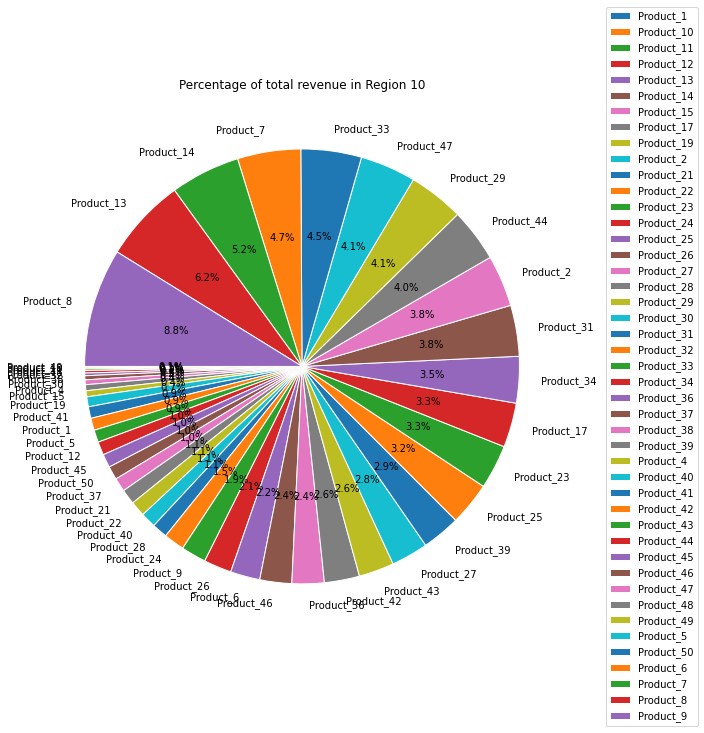

In [273]:
Total_revenue_10 = region_10.groupby('Product')['revenue'].sum()
Total_revenue_10
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_10.sort_values()).values,labels=(Total_revenue_10.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_10.index, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title('Percentage of total revenue in Region 10')
plt.show()

Regarding of sales performance of various products and region10, we can find that Product_8 is the most popular one in this area, while product_13 is close to the selling revenue of product_8. which accounts for 6.2%.

Then, we analyze the amount of units been sold.

In [282]:
Total = df.groupby('Product')['Units Sold'].sum()
Total

Product
Product_1     160.000000
Product_10    129.090791
Product_11    110.272374
Product_12     61.000000
Product_13    207.181582
Product_14    138.181582
Product_15    134.090791
Product_16    171.000000
Product_17    165.090791
Product_18    125.181582
Product_19    171.000000
Product_2     171.181582
Product_20     98.181582
Product_21    153.272374
Product_22    108.272374
Product_23    161.181582
Product_24    122.000000
Product_25    160.090791
Product_26    113.000000
Product_27    145.181582
Product_28    116.090791
Product_29    164.181582
Product_3      83.000000
Product_30    198.453956
Product_31    209.000000
Product_32     85.000000
Product_33    175.090791
Product_34    142.090791
Product_35    137.090791
Product_36     99.181582
Product_37    156.090791
Product_38    103.181582
Product_39    118.090791
Product_4     196.090791
Product_40    153.181582
Product_41    142.000000
Product_42    129.272374
Product_43    191.090791
Product_44    121.272374
Product_45    157

1) What conclusions can you draw about sales performance of various products and regions?

According to the barplot, we can clearly see that there are six regions that have revenue beyond $70000, and five of them have revenue around or above $80000 while Region 8 has the highest selling revenue. There are four regions that have lower selling revenue - Region 3, Region 1, Region 6 and Region 7 where Region 7 has the lowest selling revenue. 

We can find that Region9, Region2, Region8, region4 and region10 are the top five regions where selling revenue are higher or around $80000. 

Region 9: Product 4 has the highest selling revenue, indicating its popularity in this region.

Region 2: Product 10 accounts for the highest revenue, making it the preferred choice in this region.

Region 4: Product 31 is the most favorite product, generating the highest revenue in this region.

Region 8: Customers in this region like Product 15, which generates the highest revenue.

Region 10: Product 8 is the most popular product and contributes the highest revenue in this region.

2) What recommendations do you have for the business?

For Region 9: The e-commerce company can consider providing more quantities of Product 4 and Product 40 to meet the demand in this region.

For Region 2: It is advisable to increase the quantitles of Product 26 and Product 22 as there seems to be a higher demand for these products in this region.

For Region 4: It is highly recommended to prioritize the supply of Product 31 in order to meet the demand and thus capturing more market share.

For Region 8: To better advise the demand in this region, it is highly recommended to providing more quantities of Product 15.

For Region 10: The e-commerce company should pay attention to the demand for Product 8 and Product 13 in this region.

By clearly showing the revenue distribution for different areas in the above pie charts, we can find a strategy to improve our customer satisfaction and potentially drive higher sales in the future.

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

To do data cleaning, I decide to first find out all the null value for all columns. When product is null, we cannot determine which product the customer was buying, so we drop the null value. Same as region, we don't know which region the product is being sold, so we drop the null value in Region column too. 

For the Units Sold column, because the distribution of the column is normal, we can fill in the mean value to the null space. For Price column, I decide to drop the null value since the median and the mean value are not close to each other. 

Then, I need to drop all the row duplicates. It's highly unlikely that customer would purchase the same product (with the identical amount and prices) in the same region.

Finally, I drop the obvious outliers to not let them interrupt the data analysis process. 